## Statistical Learning Theory

#### *11 October 2019*
#### *DATA 1010*

The goal of **statistical learning** is to draw conclusions about an unknown probability measure given independent observations drawn from the measure. These observations are called **training data**. In **supervised learning**, the unknown measure $\mathbb{P}$ is on a product space $\mathcal{X} \times \mathcal{Y}$. In other words, each training observation has the form $(\mathbf{X}, Y)$ where $\mathbf{X}$ is an element of $\mathcal{X}$ and $\mathbf{Y}$ is an element of $\mathcal{Y}$. 

We aim to use the training data to predict $Y$ given $\mathbf{X}$, where $(\mathbf{X},Y)$ denotes a random variable in $\mathcal{X} \times \mathcal{Y}$ with distribution $\mathbb{P}$. 

## Problem 1

Suppose that $\mathbf{X} = [X_1, X_2]$, where $X_1$ is the color of a banana, $X_2$ is the weight of the banana, and $Y$ is a measure of banana deliciousness. Values of $X_1, X_2,$ and $Y$ are recorded for many bananas, and they are used to predict $Y$ for other bananas whose $\mathbf{X}$ values are known. 

Do you expect the prediction function to be more sensitive to changes in $X_1$ or changes in $X_2$? 

*Solution.* 

A supervised learning problem is a **regression** problem if $Y$ is quantitative ($\mathcal{Y}\subset \mathbb{R}$) and a **classification** problem if $\mathcal{Y}$ is a set of labels. 

---

We call the components of $\mathbf{X}$ *features*, *predictors*, or *input variables*, and we call $Y$ the *response variable* or *output variable*. To predict $Y$ values from $\mathbf{X}$ values, we define a function $h$ from $\mathcal{X}$ to $\mathcal{Y}$, which is called a **prediction function**. 

## Problem 2

Explain how a machine learning task like image recognition fits into this framework. In other words, describe an appropriate feature space $\mathcal{X}$, and describe in intuitive terms what the prediction function needs to accomplish.

*Solution*. 

## Problem 3

List an example of a real-world regression problem and a real-world classification problem.


*Solution*. 

To make meaningful and unambiguous statements about a proposed prediction function $h: \mathcal{X} \to \mathcal{Y}$, we need a rubric by which to assess it. This is customarily done by defining a *loss* (or *risk*, or *error*) $L(h)$, with the idea that smaller loss is better. We might wish to define $L$ only for $h$'s in a specified class $\mathcal{H}$ of candidate functions. Since $L : \mathcal{H} \to \mathbb{R}$ is defined on a set of functions, we call $L$ the **loss functional**. 

Given a statistical learning problem, a space $\mathcal{H}$ of candidate prediction functions, and a loss functional $L: \mathcal{H} \to \mathbb{R}$, we define the **target function** to be $\operatorname{argmin}_{h \in \mathcal{H}}L(h)$. 

Let's look at some common loss functionals. For regression, we often use the **mean squared error**: 

$$
L(h) = \mathbb{E}[(h(X)-Y)^2]
$$

## Problem 4

Recall the exam scores example from the KDE section of the statistics course (plot reproduced below), in which we know the exact density of the distribution which generates the hours-score pairs for students taking an exam. 

(a) What must be true of the class $\mathcal{H}$ of candidate functions in order for the target function to be equal to the regression function $r$?

(b) Suppose we collect six observations, as shown below. Can the loss value of the prediction function plotted be decreased by lowering its graph a bit?

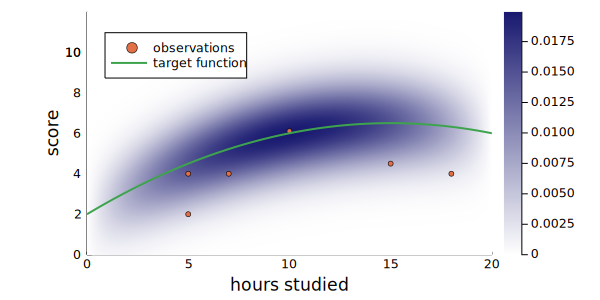

In [1]:
using LinearAlgebra, Statistics, Roots, Optim, Plots, Random
Random.seed!(1234)

# the true regression function
r(x) = 2 + 1/50*x*(30-x)
# the true density function
σy = 3/2  
f(x,y) = 3/4000 * 1/√(2π*σy^2) * x*(20-x)*exp(-1/(2σy^2)*(y-r(x))^2)

heatmap(0:0.02:20, -2:0.01:12, f, fillcolor = cgrad([:white, :MidnightBlue]), ratio = 1, fontfamily = "Palatino",
        size = (600,300), xlims = (0,20), ylims = (0,12), xlabel = "hours studied", ylabel = "score")

scatter!([(5,2), (5,4), (7,4), (15,4.5), (18, 4), (10,6.1)], markersize = 3, label = "observations")

plot!(0:0.02:20, r, label = "target function", legend = :topleft, linewidth = 2)


*Solution*. 


## Problem 5

Think of another loss functional for a regression problem.


*Solution.* 

For classification, we often consider the **misclassification probability** 

$$
L(h) = \mathbb{E}\left[\boldsymbol{1}_{\{h(\mathbf{X}) \neq Y\}}\right] = \mathbb{P}(h(\mathbf{X}) \neq Y).  
$$

## Problem 6

Find the target function for the misclassification loss in the case where $\mathcal{X} = \mathbb{R}$, $\mathcal{Y} = \{0,1\}$ and the probability mass on $\mathcal{X} \times \mathcal{Y}$ is spread out according to the **one**-dimensional density function 
$$
f(x,y) = \begin{cases}
\frac{1}{3}\mathbf{1}_{\{x \in [0,2]\}} & \text{if }y = 0 \\
\frac{1}{6}\mathbf{1}_{\{x \in [1,3]\}} & \text{if }y = 1 \\
\end{cases}
$$

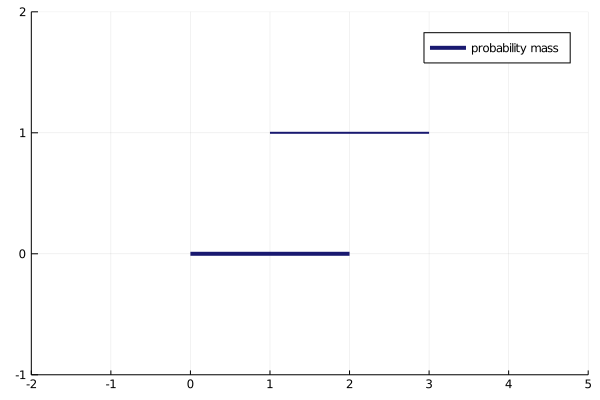

In [2]:
plot([(0,0),(2,0)], linewidth = 4, color = :MidnightBlue, label = "probability mass", xlims = (-2,5), ylims = (-1,2))
plot!([(1,1),(3,1)], linewidth = 2, color = :MidnightBlue, primary = false)

If $\mathcal{H}$ contains $G(\mathbf{x}) = \operatorname{argmax}_c\mathbb{P}(Y=c | \mathbf{X} = \mathbf{x})$, then $G$ is the target function for this loss functional. 

Note that neither of these loss functionals can be computed directly unless the probability measure $\mathbb{P}$ on $\mathcal{X} \times \mathcal{Y}$ is known. Since the goal of statistical learning is to make inferences about $\mathbb{P}$ when it is *not* known, we must approximate $L$ (and likewise also the target function $h$) using the training data. 

The most straightforward way to do this is to replace $\mathbb{P}$ with the **empirical probability measure** associated with the training data $\{(\mathbf{X}_i, Y_i)\}_{i=1}^n$. This is the probability measure which places $\frac{1}{n}$ units of probability mass at $(\mathbf{X}_i, Y_i)$, for each $i$ from $1$ to $n$. The **empirical risk** of a candidate function $h \in \mathcal{H}$ is the risk functional evaluated with respect to the empirical measure of the training data. 

A **learner** is a function which takes a set of training data as input and returns a prediction function $\widehat{h}$ as output. A common way to specify a learner is to let $\widehat{h}$ be the **empirical risk minimizer** (ERM), which is the function in $\mathcal{H}$ which minimizes the empirical risk. 

## Problem 7

Suppose that $\mathcal{X} = [0,1]$ and $\mathcal{Y} = \mathbb{R}$, and that the probability measure on $\mathcal{X} \times \mathcal{Y}$ is the one which corresponds to sampling $X$ uniformly from $[0,1]$ and then sampling $Y$ from $\mathcal{N}(X/2 + 1, 1)$. 

Let $\mathcal{H}$ be the set of monic polynomials of degree six or less. Given training observations $\{(\mathbf{X}_i, Y_i)\}_{i=1}^6$, find the risk minimizer and the empirical risk minimizer for the mean squared error. 

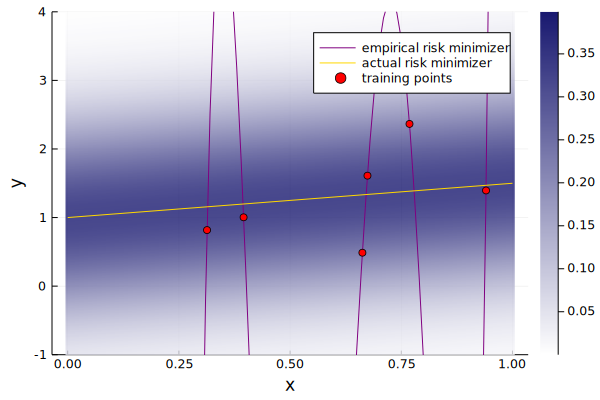

In [14]:
using Plots, Distributions, Polynomials, Random
Random.seed!(123)
X = rand(6)
Y = X/2 .+ 1 .+ randn(6)
p = Polynomials.fit(X,Y)
heatmap(0:0.01:1, -4:0.01:4, (x,y) -> pdf(Normal(x/2+1),y), opacity = 0.8, fontfamily = "Palatino",
        color = cgrad([:white, :MidnightBlue]), xlabel = "x", ylabel = "y")
plot!(0:0.01:1, x->p(x), label = "empirical risk minimizer", color = :purple)
plot!(0:0.01:1, x->x/2 + 1, label = "actual risk minimizer", color = :Gold) 
scatter!(X, Y, label = "training points", ylims = (-1,4), color = :red)

This example illustrates a phenomenon called **overfitting**. Although the empirical risk is small for the prediction function $h$ we found, smallness of the empirical risk does not imply smallness of the true risk. The difference between empirical risk and the actual value of the risk functional is called **generalization error** (or *test* error). 

We mitigate overfitting by building [**inductive bias**](gloss:inductive-bias) into the model. Common approaches include 
* using a restrictive class $\mathcal{H}$ of candidate functions, 
* **regularizing**: adding a term to the loss functional which penalizes model complexity, and 
* **cross-validating**: proposing a spectrum of candidate functions and selecting the one which performs best on withheld training observations.

## Problem 8

* Which method of introducing inductive bias does linear regression use? 
* Which method did we use for kernel density estimation in the [statistics course](https://mathigon.org/course/intro-statistics/estimating-joint-densities)? 

*Solution.* 

Inductive bias can lead to **underfitting**: relevant relations are missed, so both training and actual error are larger than necessary. The tension between underfitting and overfitting is the **bias-complexity** (or *bias-variance*) **tradeoff**. 

**Theorem** (no free lunch)  
Suppose $\mathcal{X}$ and $\mathcal{Y}$ are finite sets, and let $f$ denote a probability distribution on $\mathcal{X} \times \mathcal{Y}$. Let $D$ be a collection of $n$ independent observations from $f$, and let $h_1$ and $h_2$ be prediction functions (which associate a prediction $h_j(d,\mathbf{x}) \in \mathcal{Y}$ to each pair $(d,\mathbf{x})$ where $d$ is a set of training observations and $\mathbf{x} \in \mathcal{X}$). Consider the cost random variable $C_j = (h_j(D,X) - Y)^2$ (or $C_j = \boldsymbol{1}_{\{h_j(D,X) = Y\}}$) for $j \in \{1,2\}$. 
  
The average over all distributions $f$ of the distribution of $C_1$ is equal to the average over all distributions $f$ of the distribution of $C_2$. 

## Problem 9

The no-free-lunch theorem implies that cross-validation is exactly as effective on average as anti-cross-validation (select the worst-performing model on withheld data). What does that imply about the relationship between real-world probability distributions and the space of all probability distributions?